3주차에 수집한 데이터가 분석하기에 적절하지 않다고 생각해서

"서울시 기간별 일평균 대기환경 정보" 로 다시 수집하였습니다!

2015 ~ 2021 10월의 1~31일까지의 데이터 수집

서울의 25개구 * 1달간 데이터 (31)= 775

-> 총 7개년도 * 775 = 약 5425개 데이터

In [81]:
_url='http://openAPI.seoul.go.kr:8088'
_key='73725974496a736c34395757705847'
_type='xml'
_service='DailyAverageCityAir'

In [82]:
import requests

response=[]

In [83]:
years=[2015,2016,2017,2018,2019,2020,2021]

In [84]:
for i in years:
  for j in range(1,32):
    j=str(j).zfill(2)
    _use_day=str(i)+'10'+j
    print(_use_day)
    _start_index=1
    _end_index=5
    iter=0
    maxiter=6
    while iter<maxiter:
      _api="/".join([_url,_key,_type,_service,str(_start_index),str(_end_index),_use_day])
      response.append(requests.get(_api).text)
      _start_index+=5
      _end_index+=5
      iter+=1
    #print(response)


20151001
20151002
20151003
20151004
20151005
20151006
20151007
20151008
20151009
20151010
20151011
20151012
20151013
20151014
20151015
20151016
20151017
20151018
20151019
20151020
20151021
20151022
20151023
20151024
20151025
20151026
20151027
20151028
20151029
20151030
20151031
20161001
20161002
20161003
20161004
20161005
20161006
20161007
20161008
20161009
20161010
20161011
20161012
20161013
20161014
20161015
20161016
20161017
20161018
20161019
20161020
20161021
20161022
20161023
20161024
20161025
20161026
20161027
20161028
20161029
20161030
20161031
20171001
20171002
20171003
20171004
20171005
20171006
20171007
20171008
20171009
20171010
20171011
20171012
20171013
20171014
20171015
20171016
20171017
20171018
20171019
20171020
20171021
20171022
20171023
20171024
20171025
20171026
20171027
20171028
20171029
20171030
20171031
20181001
20181002
20181003
20181004
20181005
20181006
20181007
20181008
20181009
20181010
20181011
20181012
20181013
20181014
20181015
20181016
20181017
20181018
2

In [100]:
f = open('big_data.txt',mode='w',encoding='UTF-8')
for i in range(len(response)):
  f.write(response[i])
f.close()

In [101]:
f = open("big_data.txt", 'r',encoding='UTF-8')
data=f.read()
f.close()

In [106]:
print(data)

<?xml version="1.0" encoding="UTF-8"?>
<DailyAverageCityAir>
<list_total_count>25</list_total_count>
<RESULT>
<CODE>INFO-000</CODE>
<MESSAGE>정상 처리되었습니다</MESSAGE>
</RESULT>
<row>
<MSRDT_DE>20151001</MSRDT_DE>
<MSRRGN_NM>도심권</MSRRGN_NM>
<MSRSTE_NM>중구</MSRSTE_NM>
<PM10>15</PM10>
<PM25>7</PM25>
<O3>0.016</O3>
<NO2>0.03</NO2>
<CO>0.4</CO>
<SO2>0.004</SO2>
</row>
<row>
<MSRDT_DE>20151001</MSRDT_DE>
<MSRRGN_NM>도심권</MSRRGN_NM>
<MSRSTE_NM>종로구</MSRSTE_NM>
<PM10>15</PM10>
<PM25>8</PM25>
<O3>0.017</O3>
<NO2>0.024</NO2>
<CO>0.4</CO>
<SO2>0.006</SO2>
</row>
<row>
<MSRDT_DE>20151001</MSRDT_DE>
<MSRRGN_NM>도심권</MSRRGN_NM>
<MSRSTE_NM>용산구</MSRSTE_NM>
<PM10>16</PM10>
<PM25>10</PM25>
<O3>0.014</O3>
<NO2>0.024</NO2>
<CO>0.3</CO>
<SO2>0.004</SO2>
</row>
<row>
<MSRDT_DE>20151001</MSRDT_DE>
<MSRRGN_NM>서북권</MSRRGN_NM>
<MSRSTE_NM>은평구</MSRSTE_NM>
<PM10>16</PM10>
<PM25>11</PM25>
<O3>0.014</O3>
<NO2>0.022</NO2>
<CO>0.4</CO>
<SO2>0.005</SO2>
</row>
<row>
<MSRDT_DE>20151001</MSRDT_DE>
<MSRRGN_NM>서북권</MSRRGN_NM>
<MSRS

In [104]:
import lxml.etree
data=lxml.etree.fromstring(data)

ValueError: ignored

오류가 나서 csv파일로 대체하였습니다..

In [95]:
import pyspark

In [96]:
myConf=pyspark.SparkConf()
spark=pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).getOrCreate()

## 9-1: 문제 설정
(1) 2021년도 미세먼지 평균

(2) 2021년도와 그 외 년도 월별 초미세먼지 평균

## 9-2 : 문제의 답
(1)  2021년도 미세먼지 평균

In [114]:
df = spark.read.option("charset", "euc-kr").option("header", "true").csv("서울시 기간별 일평균 대기환경 정보.csv")

In [115]:
df.show()

+--------+------+--------+---------------+-----------------+---------+-------------------+-------------------+-------------------+
|측정일자|권역명|측정소명|미세먼지(㎍/㎥)|초미세먼지(㎍/㎥)|오존(ppm)|이산화질소농도(ppm)|일산화탄소농도(ppm)|아황산가스농도(ppm)|
+--------+------+--------+---------------+-----------------+---------+-------------------+-------------------+-------------------+
|20211103|도심권|    중구|             41|               24|    0.018|              0.034|                0.6|              0.004|
|20211103|도심권|  종로구|             41|               27|    0.021|              0.031|                0.6|              0.003|
|20211103|도심권|  용산구|             41|               28|    0.015|              0.032|                0.5|              0.003|
|20211103|서북권|  은평구|             42|               28|    0.018|              0.026|                0.9|              0.003|
|20211103|서북권|서대문구|             41|               28|     0.02|              0.021|                0.7|              0.005|
|20211103|서북권|  마포구|         

In [133]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

year=udf(lambda x :'2021' if x[:4]=='2021' else '2020',StringType())
df=df.withColumn('year',year(df['측정일자']))

In [134]:
df.show()

+--------+------+--------+---------------+-----------------+---------+-------------------+-------------------+-------------------+----+-----+
|측정일자|권역명|측정소명|미세먼지(㎍/㎥)|초미세먼지(㎍/㎥)|오존(ppm)|이산화질소농도(ppm)|일산화탄소농도(ppm)|아황산가스농도(ppm)|year|month|
+--------+------+--------+---------------+-----------------+---------+-------------------+-------------------+-------------------+----+-----+
|20211103|도심권|    중구|             41|               24|    0.018|              0.034|                0.6|              0.004|2021|   11|
|20211103|도심권|  종로구|             41|               27|    0.021|              0.031|                0.6|              0.003|2021|   11|
|20211103|도심권|  용산구|             41|               28|    0.015|              0.032|                0.5|              0.003|2021|   11|
|20211103|서북권|  은평구|             42|               28|    0.018|              0.026|                0.9|              0.003|2021|   11|
|20211103|서북권|서대문구|             41|               28|     0.02|             

In [135]:
df.groupby('year').agg({'미세먼지(㎍/㎥)':'avg'}).show()

+----+--------------------+
|year|avg(미세먼지(㎍/㎥))|
+----+--------------------+
|2020|   42.04206896551724|
|2021|   37.21120521172639|
+----+--------------------+



2021년도는 약 37.2 였다.



(2)  2021년도와 2020년도 월별 초미세먼지 평균



In [136]:
month=udf(lambda x:x[4:6],StringType())
df=df.withColumn('month',month(df['측정일자']))

In [137]:
df.show()

+--------+------+--------+---------------+-----------------+---------+-------------------+-------------------+-------------------+----+-----+
|측정일자|권역명|측정소명|미세먼지(㎍/㎥)|초미세먼지(㎍/㎥)|오존(ppm)|이산화질소농도(ppm)|일산화탄소농도(ppm)|아황산가스농도(ppm)|year|month|
+--------+------+--------+---------------+-----------------+---------+-------------------+-------------------+-------------------+----+-----+
|20211103|도심권|    중구|             41|               24|    0.018|              0.034|                0.6|              0.004|2021|   11|
|20211103|도심권|  종로구|             41|               27|    0.021|              0.031|                0.6|              0.003|2021|   11|
|20211103|도심권|  용산구|             41|               28|    0.015|              0.032|                0.5|              0.003|2021|   11|
|20211103|서북권|  은평구|             42|               28|    0.018|              0.026|                0.9|              0.003|2021|   11|
|20211103|서북권|서대문구|             41|               28|     0.02|             

In [138]:
avg_df=df.groupby('year').pivot('month').agg({'초미세먼지(㎍/㎥)':'avg'})

In [139]:
avg_df.show()

+----+------------------+------------------+-----------------+-----+-----------------+------+------------------+------------------+-----------------+-----------------+------------------+-----------------+
|year|                01|                02|               03|   04|               05|    06|                07|                08|               09|               10|                11|               12|
+----+------------------+------------------+-----------------+-----+-----------------+------+------------------+------------------+-----------------+-----------------+------------------+-----------------+
|2020|              null|              null|             null| null|             null|  null|              null|              null|             null|             null|24.595555555555556|26.63483870967742|
|2021|21.033548387096776|29.302857142857142|32.12774193548387|18.56|19.63741935483871|19.032|15.061935483870968|12.883870967741936|7.074666666666666|12.96774193548387|             

In [140]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

avg_df=avg_df.toPandas()
avg_df.set_index(['year'])
t=avg_df.drop('year',axis=1).T
t.rename(columns = {0 : '2020',1:'2021'}, inplace = True)

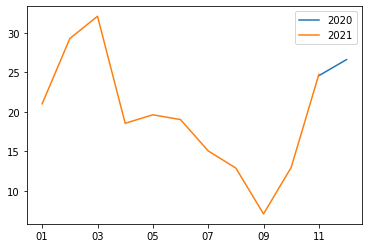

In [141]:
t.plot(kind='line')

1년단위 데이터라 아쉽게도 2020년 1-10월 데이터는 없었습니다. 만약 위의 데이터가 dataframe으로 잘 만들어졌으면 더 유의미한 분석이 되었을것 같습니다.!